# Entropy maps or voxets as a local measure of uncertainty
Here we use Shanon's entropy (See e.g. https://en.wikipedia.org/wiki/Entropy_(information_theory)).

Let us consider the variable $X$ that represent a voxel property and assume that it can take $n$ distinct values among an ensemble of voxets. By denoting the probability of observing the $i^{th}$ possible value as $p_i$, the entropy $H$ of $X$ is computed as follows:

$$
H(X)=-\sum \limits _{i=1} ^{n} p_i \ln p_i
$$

In [1]:
# import modules
import numpy as np
from datetime import datetime
import pickle
from loopUI import entropy,continuous_entropy, plot_voxet

picklefilenameentropy = "./pickledata/synthetic-case-entropy.pickle"
picklefilenamedata = "./pickledata/synthetic-case-data.pickle"

# plotting parameters
slice_ix=0
slice_iy=0
slice_iz=7
aspectratio = 1 # !! in pixels !!

# continuous entropy parameters
nbins=50 # continuous entropy discretization

# import data
with open(picklefilenamedata, 'rb') as f:
    [lithocode_100,lithocode_50A,lithocode_50B,scalarfield_100,scalarfield_50A,
     scalarfield_50B,nx,ny,nz,nbsamples,clblab,clblabsf] = pickle.load(f)


## Categorical variable
The definition of Shanon's entropy is valid for discrete variables. 

08-Nov-2021 (13:08:48) - COMPUTING lithocode_100 entropy START 
08-Nov-2021 (13:08:49) - COMPUTING lithocode_100 entropy END


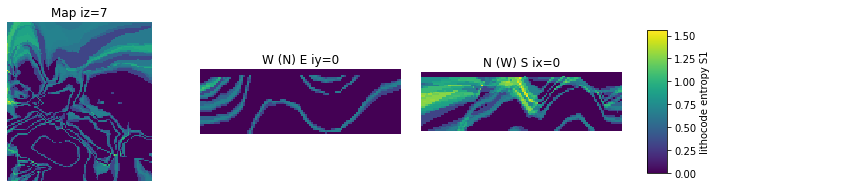

08-Nov-2021 (13:08:49) - COMPUTING lithocode_50A entropy START 
08-Nov-2021 (13:08:49) - COMPUTING lithocode_50A entropy END


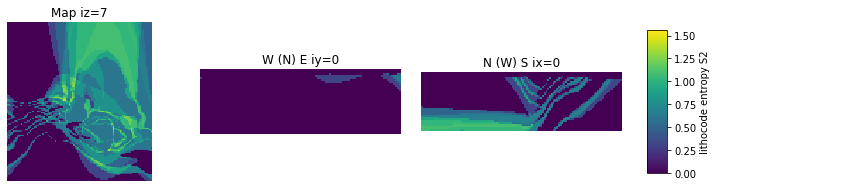

08-Nov-2021 (13:08:50) - COMPUTING lithocode_50B entropy START 
08-Nov-2021 (13:08:50) - COMPUTING lithocode_50B entropy END


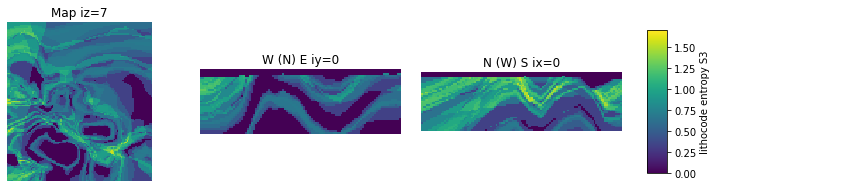

In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_100 entropy START ")
ent_lc_100 = entropy(lithocode_100)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_100 entropy END")
plot_voxet(ent_lc_100,-1,clblab+' entropy S1',slice_ix,slice_iy,slice_iz,aspectratio,'viridis')

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50A entropy START ")
ent_lc_50A = entropy(lithocode_50A)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50A entropy END")
plot_voxet(ent_lc_50A,-1,clblab+' entropy S2',slice_ix,slice_iy,slice_iz,aspectratio,'viridis')

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50B entropy START ")
ent_lc_50B = entropy(lithocode_50B)   
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING lithocode_50B entropy END")
plot_voxet(ent_lc_50B,-1,clblab+' entropy S3',slice_ix,slice_iy,slice_iz,aspectratio,'viridis')


## Continuous variable
In the continuous case, one need to discretize the continuous domain and integrate with the width of the bins.
See paper of C. Marsh at https://www.crmarsh.com/static/pdf/Charles_Marsh_Continuous_Entropy.pdf

Here we discretize the support of the continuous variable $X$ in $n$ regular bins and by denoting $p_i$ as the probability to observe a value in the $i^{th}$ bin, we can apply equation (1).


08-Nov-2021 (13:08:50) - COMPUTING scalarfield_100 continuous entropy START
08-Nov-2021 (13:08:51) - COMPUTING scalarfield_100 continuous entropy END


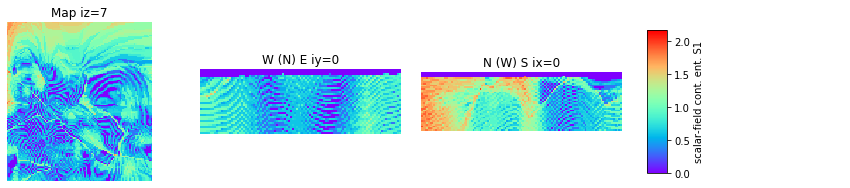

08-Nov-2021 (13:08:51) - COMPUTING scalarfield_50A continuous entropy START
08-Nov-2021 (13:08:52) - COMPUTING scalarfield_50A continuous entropy END


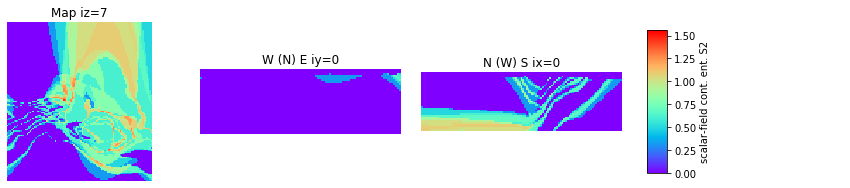

08-Nov-2021 (13:08:53) - COMPUTING scalarfield_50B continuous entropy START
08-Nov-2021 (13:08:54) - COMPUTING scalarfield_50B continuous entropy END


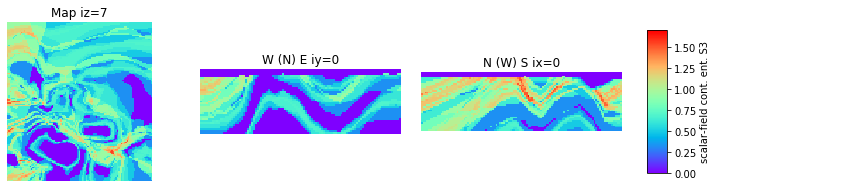

In [3]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING scalarfield_100 continuous entropy START")
ent_sf_100 = continuous_entropy(scalarfield_100,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING scalarfield_100 continuous entropy END")
plot_voxet(ent_sf_100,-1,clblabsf+' cont. ent. S1',slice_ix,slice_iy,slice_iz,aspectratio)

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING scalarfield_50A continuous entropy START")
ent_sf_50A = continuous_entropy(scalarfield_50A,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING scalarfield_50A continuous entropy END")
plot_voxet(ent_lc_50A,-1,clblabsf+' cont. ent. S2',slice_ix,slice_iy,slice_iz,aspectratio)

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING scalarfield_50B continuous entropy START")
ent_sf_50B = continuous_entropy(scalarfield_50B,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING scalarfield_50B continuous entropy END")
plot_voxet(ent_lc_50B,-1,clblabsf+' cont. ent. S3',slice_ix,slice_iy,slice_iz,aspectratio)


## Comparison plot
Here we compare Shannon's entropy and the continuous entropy computed from the lithocode and scalar-field 3D voxets, respectively.

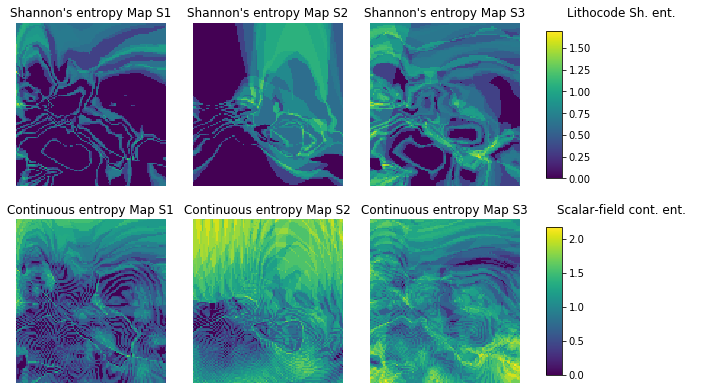

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(2,4) #,figsize=(13,13)
ax[0,0].axis('off')
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[0,3].axis('off')
ax[1,0].axis('off')
ax[1,1].axis('off')
ax[1,2].axis('off')
ax[1,3].axis('off')
axins03 = inset_axes(ax[0,3],
                   width="10%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='center left'
                   )
axins13 = inset_axes(ax[1,3],
                   width="10%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='center left'
                   )
ax[0,0].set_title('Shannon\'s entropy Map S1')
ax[0,1].set_title('Shannon\'s entropy Map S2') # 'entropy W (N) E'
ax[0,2].set_title('Shannon\'s entropy Map S3') # 'entropy N (W) S'
ax[0,3].set_title('Lithocode Sh. ent.')
ax[1,0].set_title('Continuous entropy Map S1')
ax[1,1].set_title('Continuous entropy Map S2') # 'Range $R$ W (N) E'
ax[1,2].set_title('Continuous entropy Map S3') # 'Range $R$ N (W) S'
ax[1,3].set_title('Scalar-field cont. ent.')
vmin = np.min([np.min(ent_lc_100),np.min(ent_lc_50A),np.min(ent_lc_50B)])
vmax = np.max([np.max(ent_lc_100),np.max(ent_lc_50A),np.max(ent_lc_50B)])
pos00 = ax[0,0].imshow(ent_lc_100[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
ax[0,1].imshow(ent_lc_50A[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(ent[:,0,:],cmap='viridis',vmin=vmin,vmax=vmax)
ax[0,2].imshow(ent_lc_50B[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(ent[:,:,0],cmap='viridis',vmin=vmin,vmax=vmax)
fig.colorbar(pos00,cax=axins03)  #,label=clblab
vmin = np.nanmin([np.nanmin(ent_sf_100),np.nanmin(ent_sf_50A),np.nanmin(ent_sf_50B)])
vmax = np.nanmax([np.nanmax(ent_sf_100),np.nanmax(ent_sf_50A),np.nanmax(ent_sf_50B)])
pos10 = ax[1,0].imshow(ent_sf_100[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax)
ax[1,1].imshow(ent_sf_50A[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_rng[:,0,:],cmap='viridis',vmin=vmin,vmax=vmax)
ax[1,2].imshow(ent_sf_50B[slice_iz,:,:],origin='lower',cmap='viridis',vmin=vmin,vmax=vmax) # .imshow(rho_rng[:,:,0],cmap='viridis',vmin=vmin,vmax=vmax)
fig.colorbar(pos10,cax=axins13)  #,label=clblab
fig.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.25, wspace=0.1, hspace=0.2)
plt.show()


## Save computed indicators

In [5]:
with open(picklefilenameentropy, 'wb') as f:
    pickle.dump([ent_lc_100,ent_lc_50A,ent_lc_50B,ent_sf_100,ent_sf_50A,ent_sf_50B], f)